<a href="https://colab.research.google.com/github/schaidez2727/MAT-421/blob/main/ModuleB_2_MAT421_Chaidez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module B_2 (HW 3) - MAT 421 #
#### Santana Chaidez ####

____
## Lagrange Polynomial Interpolation ##
___

* **Lagrange polynomial interpolation** finds a *single polynomial* that passes through all of the discrete data points, called the **Lagrange polynomial**
* Lagrange polynomial --> L(x_i) = y_i for all points in dataset
* L(x) is a sum of **Lagrange basis polynomials** multiplied by their corresponding y-value, which are defined as P_i(x) = ∏n_j=1,j≠i[(x−x_j)/(x_i−x)]
* Note: P_i(x_j) = 1 when i = j, and P_i(x_j) = 0 when i =/= j

In [6]:
import numpy as np
# importing Python library, NumPy, which fascilitates various forms of scientific computing
import numpy.polynomial.polynomial as poly
# will me used to formulate out Lagrange basis polynomials
import matplotlib.pyplot as plt
# library MatPlotLib allows us to create visuals and plot data points

Let's do an example!
* Dataset: x = [0, 2, 4], y = [1, 3, 2]
* P_1(x) = [(x - x_2)(x - x_3)]/[(x_1 - x_2)(x_1 - x_3)] = (x-2)(x-4)/[(0-2)(0-4)] = (x^2 - 6x + 8)/8
* P_2(x) = [(x - x_1)(x - x_3)]/[(x_2 - x_1)(x_2 - x_3)] = (x-0)(x-4)/[(2-0)(2-4)] = (x^2 - 4x)/(-4)
* P_3(x) = [(x - x_1)(x - x_2)]/[(x_3 - x_1)(x_3 - x_2)] = (x-0)(x-2)/[(4-0)(4-2)] = (x^2 -2x)/8

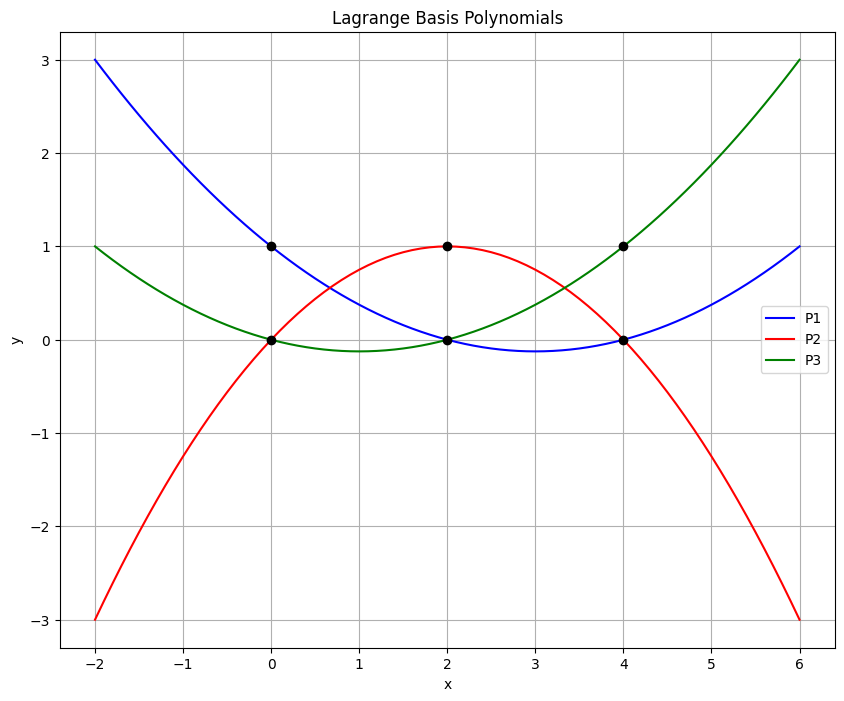

In [7]:
# Example of finding Lagrange basis polynomials
# Then summing them to find Lagrange polynomial for discrete dataset

# Defining out dataset
x = [0, 2, 4]
y = [1, 3, 2]
# Define the coefficients for the Lagrange basis polynomials, starting with constant coefficient
P1_coeff = [1, -0.75, 0.125]
# P_1(x) = (1/8)x^2 - (3/4)x + 1 --> [c, b, a] = [1, -3/4, 1/8] = [1, -0.75, 0.125]
P2_coeff = [0, 1, -0.25]
# P_2(x) = (-1/4)x^2 + x --> [c, b, a] = [0, 1, -1/4] = [0, 1, -0.25]
P3_coeff = [0, -0.25, 0.125]
# P_3(x) = (1/8)x^2 - (1/4)x --> [c, b, a] = [0, -1/4, 1/8] = [0, -0.25, 0.125]

# produce the polynomial functions for the basis polynomials
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

# Plotting our basis polynomials
x_new = np.arange(-2.0, 6.1, 0.1)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')
plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

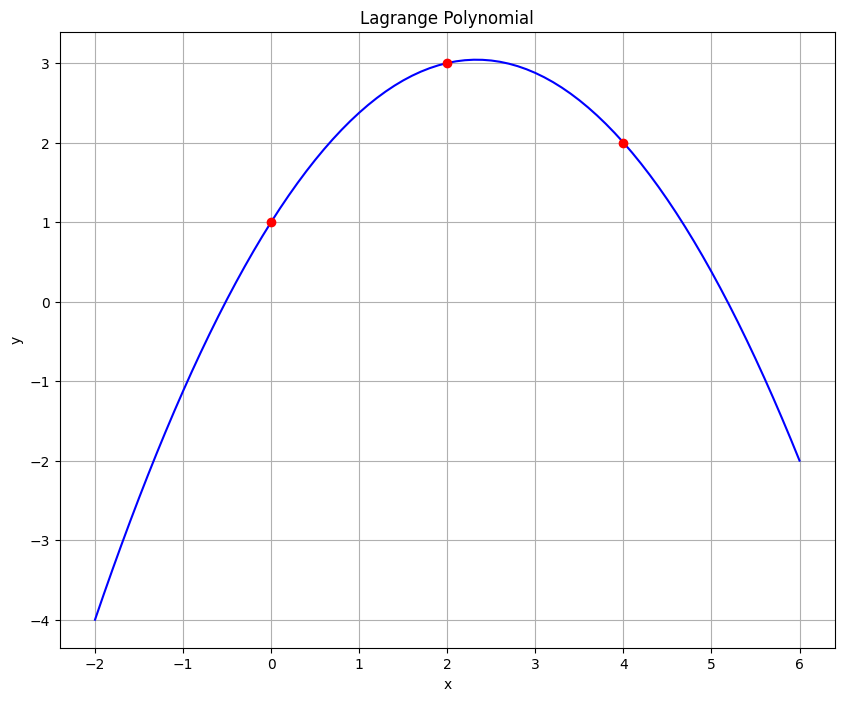

In [8]:
# Now, sum the basis polynomials to find and plot out Lagrange polynomial
L = P1 + 3*P2 + 2*P3
# L(x) = y_1*P_1 + y_2*P_2 + y_3*P_3 = (1)P_1 + (3)P_2 + (2)P_3

# Plotting our Lagrange polynomial
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

* Note that the Lagrange polynomial is defined outside of the area of interpolation (the interval that our dataset spans), [x_1, x_n]
* Should *not* use Lagrange polynomial to interpolate outside this region, as it grows quickly and does not accurately represent the behavior of the data

We can also use SciPy to produce the Lagrange polynomial directly without having to manually do any basis polynomial or summation calculations!

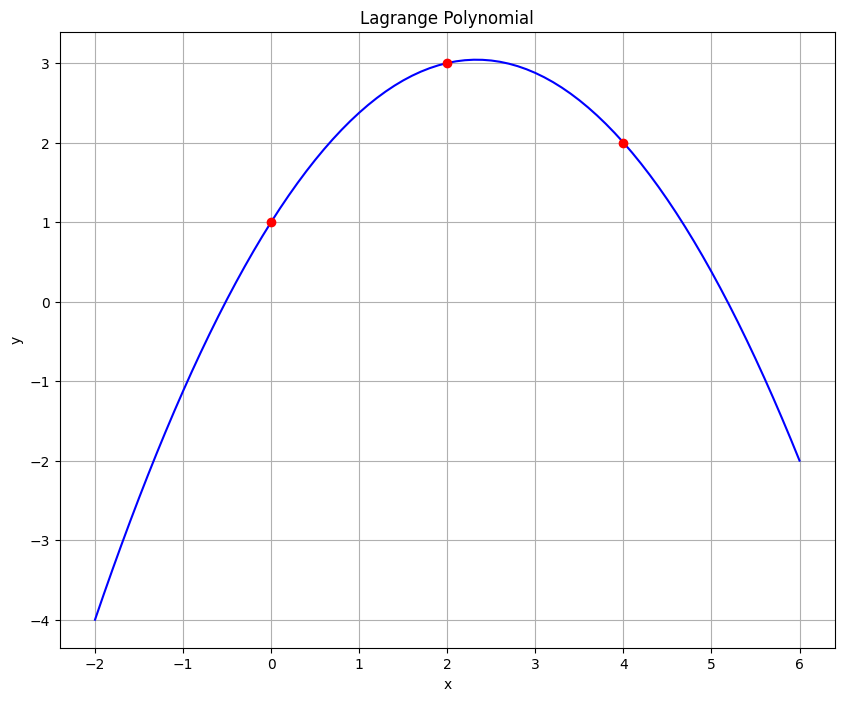

In [9]:
from scipy.interpolate import lagrange
# importing lagrange scipy library
f = lagrange(x, y)
# using lagrange function from scipy library and applying it to our dataset

# Let's plot out Lagrange polynomial
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

____
## Newton's Polynomial Interpolation ##
___

* **Newton's polynomial interpolation** is another method of producing a single polynomial that fits/goes through all discrete data points, called **Newton's polynomial**
* For a dataset with *n* points, the general form for the corresponding *n-1* order Newton's polynomial is:
f(x) = a0+a1(x−x0)+a2(x−x0)(x−x1)+⋯+an(x−x0)(x−x1)…(x−xn)
* Coefficients a_i can be found with a simple mathematical procedure, since f(x_i) = y_i for a point (x_i, y_i) in the dataset
* This results in the coefficients being defined by **divided differences**, and we can use a matrix to solve for these coefficients

In [10]:
# Example of finding Newton's polynomial for a given dataset

# Defining our dataset
x = [5, 2, 7, -4]
y = [6, -2, -7, 0]

%matplotlib inline

In [11]:
# Setting up provided functions for solving coefficient matrix
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

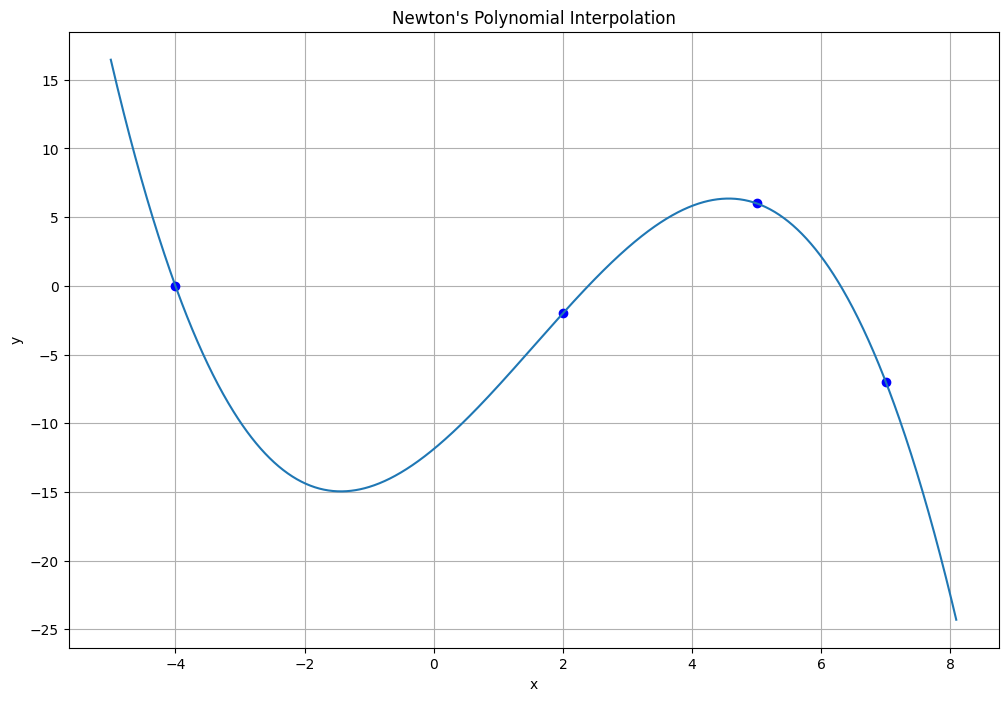

In [13]:
X = np.array(x)
Y = np.array(y)
a_s = divided_diff(x, y)[0, :] # Calculating coefficients via the divided difference

# evaluate on new data points
x_new = np.arange(-5, 8.1, .01)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title("Newton's Polynomial Interpolation")
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As we can see, Newton's polynomial interpolation produces a smooth polynomial that passes through all of the points in our dataset.